# Data Analysis

## This is a data analysis for the academia.stackexchange.com data dump.

In [1]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np
from academia_tag_recommender.prints import printVal, printStats, printFrequencyStats

## Users

In [2]:
from academia_tag_recommender.data import users

print('There are {0} users'.format(len(users)))

print('Example user:')
print(users[0].attrib)

There are 100321 users
Example user:
{'Id': '-1', 'Reputation': '1', 'CreationDate': '2012-02-14T18:31:38.453', 'DisplayName': 'Community', 'LastAccessDate': '2012-02-14T18:31:38.453', 'WebsiteUrl': 'http://meta.stackexchange.com/', 'Location': 'on the server farm', 'AboutMe': '<p>Hi, I\'m not really a person.</p>\n\n<p>I\'m a background process that helps keep this site clean!</p>\n\n<p>I do things like</p>\n\n<ul>\n<li>Randomly poke old unanswered questions every hour so they get some attention</li>\n<li>Own community questions and answers so nobody gets unnecessary reputation from them</li>\n<li>Own downvotes on spam/evil posts that get permanently deleted</li>\n<li>Own suggested edits from anonymous users</li>\n<li><a href="http://meta.stackexchange.com/a/92006">Remove abandoned questions</a></li>\n</ul>\n', 'Views': '0', 'UpVotes': '20388', 'DownVotes': '15368', 'AccountId': '-1'}


## Tags

In [3]:
from academia_tag_recommender.data import tags

print('There are {0} tags'.format(len(tags)))

print('Example tag:')
print(tags[0].attrib)

sortedTags = sorted(tags, key=lambda x: int(x.attrib['Count']), reverse=True)

There are 452 tags
Example tag:
{'Id': '2', 'TagName': 'visa', 'Count': '86', 'ExcerptPostId': '7686', 'WikiPostId': '7685'}


### Wie häufig werden die Tags benutzt? (Tag Distribution / Usage frequency)

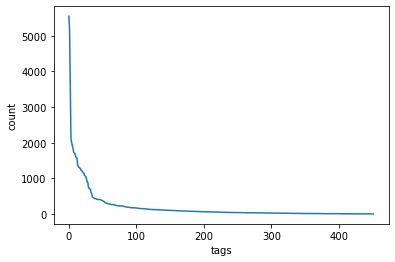

10 Tags with highest count:
Tag name             Count          
publications         5548           
phd                  5139           
graduate-admissions  3696           
research-process     2113           
graduate-school      2017           
citations            1917           
thesis               1845           
peer-review          1736           
mathematics          1708           
journals             1689           
masters              1609           


In [4]:
x = range(0, len(sortedTags))
y = list(map(lambda x: int(x.attrib['Count']), sortedTags))
plt.plot(x, y)
plt.xlabel('tags')
plt.ylabel('count')
plt.show()

print('10 Tags with highest count:')
print('{:<20} {:<15}'.format('Tag name', 'Count'))
for tag in sortedTags[0:11]:
    print('{:<20} {:<15}'.format(tag.attrib['TagName'], tag.attrib['Count']))

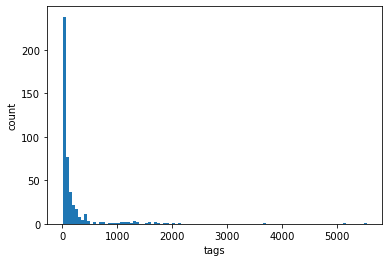

In [5]:
y = list(map(lambda x: int(x.attrib['Count']), sortedTags))
plt.hist(y, bins=100)
plt.xlabel('tags')
plt.ylabel('count')
plt.show()

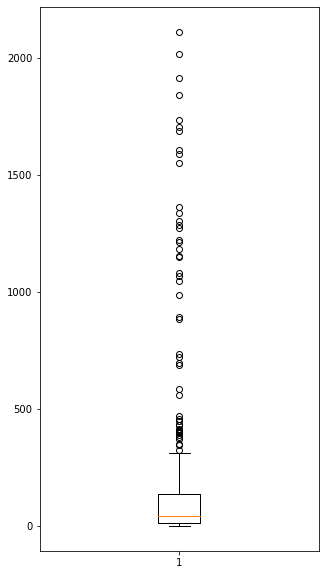

Max:                5548                
Third Quartile:     144.25              
Mean:               196.40265486725664  
Median:             46.5                
First Quartile:     15.75               
Min:                1                   
Standard deviation: 507.9936082379884   
Variance:           258057.5060106508   


In [6]:
tagCounts = list(map(lambda x: int(x.attrib['Count']), sortedTags))

fig, ax = plt.subplots(figsize=(5,10))
ax.boxplot(tagCounts[3:len(tagCounts)])
plt.show()

printStats(tagCounts)

In [7]:
print('{:<25}{:<30}{:<35}{:<25}{:<30}'.format('Usage frequency range', 'Number of tags in the range', 'Number of tags in the range [%]', 'Cumulative total usage', 'Cumulative total usage [%]'))
printFrequencyStats(sortedTags, 0, 10)
printFrequencyStats(sortedTags, 10, 100)
printFrequencyStats(sortedTags, 100, 1000)
printFrequencyStats(sortedTags, 1000, 5548)
printFrequencyStats(sortedTags, 0, 5548)

Usage frequency range    Number of tags in the range   Number of tags in the range [%]    Cumulative total usage   Cumulative total usage [%]    
(0, 10]                  89                            19.69                              486                      0.55                          
(10, 100]                217                           48.01                              9544                     10.75                         
(100, 1000]              120                           26.55                              30879                    34.78                         
(1000, 5548]             26                            5.75                               47865                    53.92                         
(0, 5548]                452                           100.00                             88774                    100.00                        


In [8]:
print('{:<25}{:<30}{:<35}{:<25}{:<30}'.format('Usage frequency range', 'Number of tags in the range', 'Number of tags in the range [%]', 'Cumulative total usage', 'Cumulative total usage [%]'))
printFrequencyStats(sortedTags, 0, 600)
printFrequencyStats(sortedTags, 600, 1000)
printFrequencyStats(sortedTags, 1000, 2000)
printFrequencyStats(sortedTags, 2000, 5548)
printFrequencyStats(sortedTags, 0, 5548)

Usage frequency range    Number of tags in the range   Number of tags in the range [%]    Cumulative total usage   Cumulative total usage [%]    
(0, 600]                 419                           92.70                              35292                    39.75                         
(600, 1000]              7                             1.55                               5617                     6.33                          
(1000, 2000]             21                            4.65                               29352                    33.06                         
(2000, 5548]             5                             1.11                               18513                    20.85                         
(0, 5548]                452                           100.00                             88774                    100.00                        


## Posts

In [9]:
from academia_tag_recommender.data import posts

print('There are {0} posts'.format(len(posts)))

print('Example post:')
print(posts[0].attrib)

There are 112154 posts
Example post:
{'Id': '1', 'PostTypeId': '1', 'AcceptedAnswerId': '180', 'CreationDate': '2012-02-14T20:23:40.127', 'Score': '20', 'ViewCount': '532', 'Body': '<p>As from title. What kind of visa class do I have to apply for, in order to work as an academic in Japan ? </p>\n', 'OwnerUserId': '5', 'LastEditorUserId': '2700', 'LastEditDate': '2013-10-30T09:14:11.633', 'LastActivityDate': '2020-01-06T22:44:41.020', 'Title': 'What kind of Visa is required to work in Academia in Japan?', 'Tags': '<job-search><visa><japan>', 'AnswerCount': '2', 'CommentCount': '1', 'FavoriteCount': '1', 'ContentLicense': 'CC BY-SA 3.0'}


In [10]:
from academia_tag_recommender.data import questions
print('There are {0} questions'.format(len(questions)))

There are 33082 questions


In [11]:
print(questions[0].attrib['Tags'])
for question in questions:
    if type(question.attrib['Tags']) != list:
        tags_ = question.attrib['Tags'].replace('<', '').split('>')
        question.attrib['Tags'] = tags_[0:(len(tags_)-1)]
print(questions[0].attrib['Tags'])

<job-search><visa><japan>
['job-search', 'visa', 'japan']


Number of Tags Number of Questions Percentage
1              5541                16.75 %
2              10022               30.29 %
3              9608                29.04 %
4              5190                15.69 %
5              2721                8.23 %


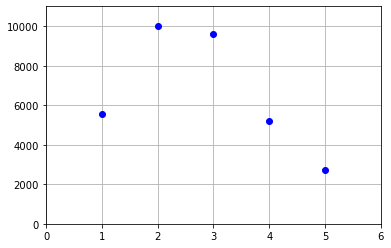

In [12]:
tagsPerQuestion = list(map(lambda x: len(x.attrib['Tags']), questions))
tagAmounts = []
print('{:<15}{:<20}{}'.format('Number of Tags', 'Number of Questions', 'Percentage'))
for tagAmount in range(1,6):
    numOfQuestionsForTagAmount = len(list(filter(lambda x: x == tagAmount, tagsPerQuestion)))
    percentage = numOfQuestionsForTagAmount / len(questions) * 100
    tagAmounts.append(numOfQuestionsForTagAmount)
    print('{:<15}{:<20}{:2.2f} %'.format(tagAmount, numOfQuestionsForTagAmount, percentage))

plt.plot([1, 2, 3, 4, 5], tagAmounts, 'bo')
plt.axis([0, 6, 0, 11000])
plt.grid(True)
plt.show()

### Wie ist der Zusammenhang zwischen Tags und ViewCount?

Number of Tags Average View Count
1              2410.16
2              2908.53
3              3075.22
4              2917.57
5              2514.85


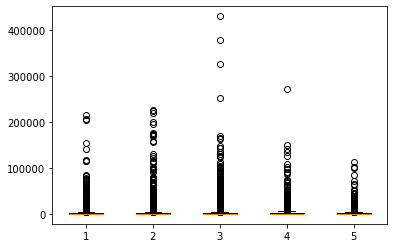

In [13]:
viewCountForTagAmount = []
print('{:<15}{}'.format('Number of Tags', 'Average View Count'))
for tagAmount in range(1,6):
    viewCounts = list(map(lambda x: int(x.attrib['ViewCount']), filter(lambda x: len(x.attrib['Tags']) == tagAmount, questions)))
    averageViewCount = np.average(viewCounts)
    viewCountForTagAmount.append(viewCounts)
    print('{:<15}{:2.2f}'.format(tagAmount, averageViewCount))

plt.boxplot(viewCountForTagAmount)
plt.show()

### Wie ist der Zusammenhang zwischen Tags und Score?

Number of Tags Average Score
1              7.19
2              8.93
3              9.53
4              10.29
5              9.55


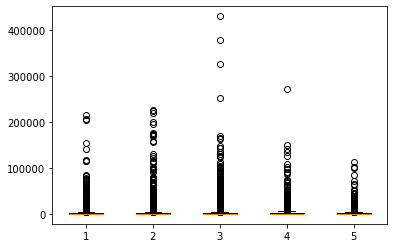

In [14]:
scoreForTagAmount = []
print('{:<15}{}'.format('Number of Tags', 'Average Score'))
for tagAmount in range(1,6):
    scores = list(map(lambda x: int(x.attrib['Score']), filter(lambda x: len(x.attrib['Tags']) == tagAmount, questions)))
    averageScore = np.average(scores)
    scoreForTagAmount.append(scores)
    print('{:<15}{:2.2f}'.format(tagAmount, averageScore))

plt.boxplot(viewCountForTagAmount)
plt.show()

### Wie ist der Zusammenhang zwischen Tags und AnswerCount?

Number of Tags Average Answer Count
1              2.18
2              2.34
3              2.42
4              2.46
5              2.39


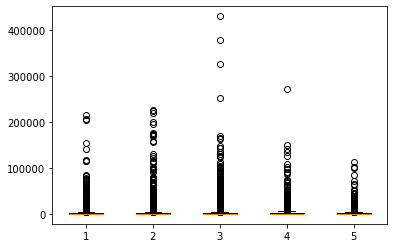

In [15]:
answerCountForTagAmount = []
print('{:<15}{}'.format('Number of Tags', 'Average Answer Count'))
for tagAmount in range(1,6):
    answerCounts = list(map(lambda x: int(x.attrib['AnswerCount']), filter(lambda x: len(x.attrib['Tags']) == tagAmount, questions)))
    averageAnswerCount = np.average(answerCounts)
    answerCountForTagAmount.append(answerCounts)
    print('{:<15}{:2.2f}'.format(tagAmount, averageAnswerCount))

plt.boxplot(viewCountForTagAmount)
plt.show()

### Wie ist der Zusammenhang zwischen Tags und CommentCount?

Number of Tags Average Comment Count
1              3.73
2              3.85
3              4.12
4              4.26
5              4.35


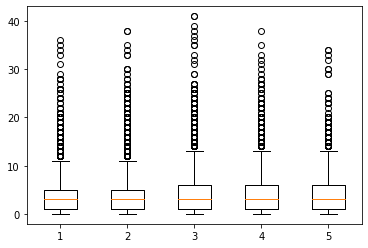

In [16]:
commentCountForTagAmount = []
print('{:<15}{}'.format('Number of Tags', 'Average Comment Count'))
for tagAmount in range(1,6):
    commentCounts = list(map(lambda x: int(x.attrib['CommentCount']), filter(lambda x: len(x.attrib['Tags']) == tagAmount, questions)))
    averageCommentCount = np.average(commentCounts)
    commentCountForTagAmount.append(commentCounts)
    print('{:<15}{:2.2f}'.format(tagAmount, averageCommentCount))

plt.boxplot(commentCountForTagAmount)
plt.show()

### Welchen Einfluss haben Tags darauf ob eine Frage beantwortet wird?

Beantwortete Fragen: 14412
Unbeantwortete Fragen: 18670


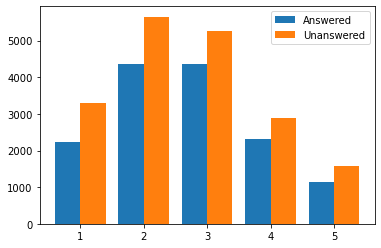

In [17]:
questionsWithAnswers = list(filter(lambda x: 'AcceptedAnswerId' in x.keys(), questions))
questionsWithoutAnswers = list(filter(lambda x: 'AcceptedAnswerId' not in x.keys(), questions))

print('Beantwortete Fragen: {}'.format(len(questionsWithAnswers)))
print('Unbeantwortete Fragen: {}'.format(len(questionsWithoutAnswers)))

def getTagAmount(q):
    tagsPerQuestion = list(map(lambda x: len(x.attrib['Tags']), q))
    tagAmounts = []
    for tagAmount in range(1,6):
        numOfQuestionsForTagAmount = len(list(filter(lambda x: x == tagAmount, tagsPerQuestion)))
        tagAmounts.append(numOfQuestionsForTagAmount)
    return tagAmounts

tagAmountsForAnsweredQuestions = getTagAmount(questionsWithAnswers)
tagAmountForUnansweredQuestions = getTagAmount(questionsWithoutAnswers)

barWidth = 0.4
    
xs = [1, 2, 3 , 4, 5]
fig, ax = plt.subplots()
ax.bar(xs, tagAmountsForAnsweredQuestions, width=barWidth, label='Answered')
ax.bar([x + barWidth for x in xs], tagAmountForUnansweredQuestions, width=barWidth, label='Unanswered')
ax.set_xticks([x + barWidth / 2 for x in xs])
ax.set_xticklabels(xs)
ax.legend()
plt.show()

Number of Tags Answered [%]   Unanswered [%] 
1              0.40           0.60           
2              0.44           0.56           
3              0.45           0.55           
4              0.44           0.56           
5              0.42           0.58           


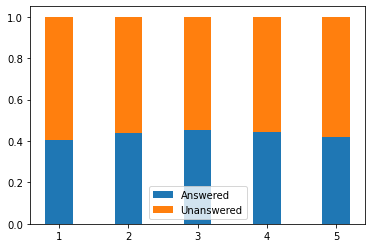

In [18]:
print('{:<15}{:<15}{:<15}'.format('Number of Tags', 'Answered [%]', 'Unanswered [%]'))
answeredPercentages = []
unansweredPercentages = []
for tagAmount in range(1,6):
    answeredPercentage = tagAmountsForAnsweredQuestions[tagAmount-1] / len(list(filter(lambda x: x == tagAmount, tagsPerQuestion)))
    answeredPercentages.append(answeredPercentage)
    unansweredPercentage = tagAmountForUnansweredQuestions[tagAmount-1] / len(list(filter(lambda x: x == tagAmount, tagsPerQuestion)))
    unansweredPercentages.append(unansweredPercentage)
    print('{:<15}{:<15.2f}{:<15.2f}'.format(tagAmount, answeredPercentage, unansweredPercentage))

barWidth = 0.4
    
xs = [1, 2, 3 , 4, 5]
plt.bar(xs, answeredPercentages, width=barWidth, label='Answered')
plt.bar(xs, unansweredPercentages, bottom=answeredPercentages, width=barWidth, label='Unanswered')
plt.legend()
plt.show()

### Aus wie vielen Charaktern bestehen Titel?

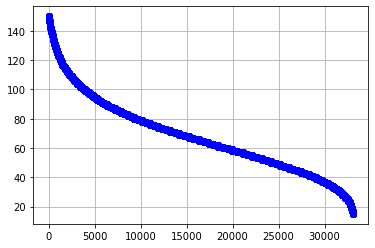

Max:                150                 
Third Quartile:     83.0                
Mean:               68.01481168006771   
Median:             65.0                
First Quartile:     49.0                
Min:                15                  
Standard deviation: 25.582454250678982  
Variance:           654.4619654880831   


In [19]:
titleLengthPerQuestion = sorted(list(map(lambda x: len(x.attrib['Title']), questions)), key=lambda x: x, reverse=True)

x = range(0, len(titleLengthPerQuestion))
y = titleLengthPerQuestion
plt.plot(x, y, 'bo')
plt.grid(True)
plt.show()

printStats(titleLengthPerQuestion)

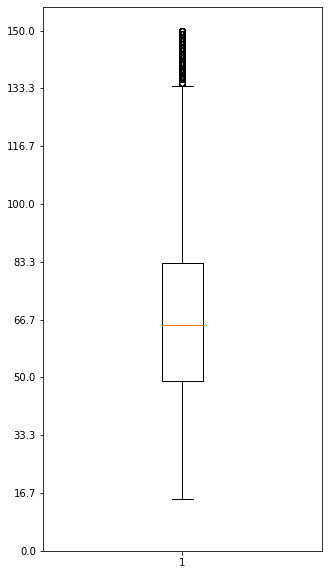

In [20]:
fig, ax = plt.subplots(figsize=(5,10))
ax.boxplot(titleLengthPerQuestion)
yticks = np.linspace(0, titleLengthPerQuestion[0], 10)
ax.set_yticks(yticks)
plt.show()

### Aus wie vielen Charaktern besteht der Text?

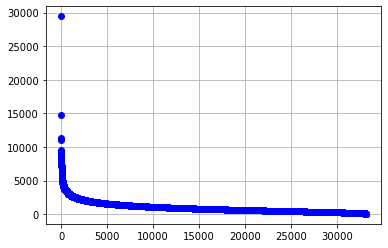

Max:                29464               
Third Quartile:     1224.0              
Mean:               965.5370594280878   
Median:             754.0               
First Quartile:     457.0               
Min:                40                  
Standard deviation: 795.6353718727355   
Variance:           633035.6449750662   


In [21]:
textLengthPerQuestion = sorted(list(map(lambda x: len(x.attrib['Body']), questions)), key=lambda x: x, reverse=True)

x = range(0, len(textLengthPerQuestion))
y = textLengthPerQuestion
plt.plot(x, y, 'bo')
plt.grid(True)
plt.show()

printStats(textLengthPerQuestion)

In [22]:
print('Länge der 10 längsten Texte:')
for textLength in textLengthPerQuestion[0:11]:
    print(textLength)

Länge der 10 längsten Texte:
29464
14747
11376
11097
9598
9299
9125
9084
8988
8946
8935


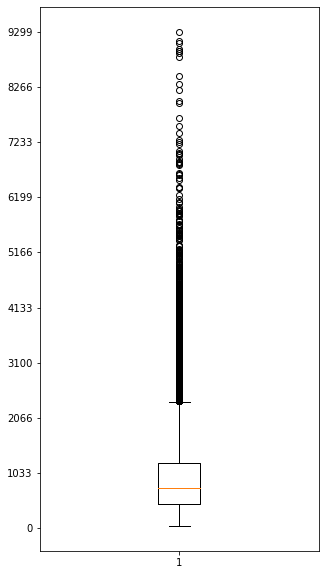

In [23]:
fig, ax = plt.subplots(figsize=(5,10))
ax.boxplot(textLengthPerQuestion[5:len(textLengthPerQuestion)])
yticks = np.linspace(0, textLengthPerQuestion[5], 10)
ax.set_yticks(yticks)
plt.show()

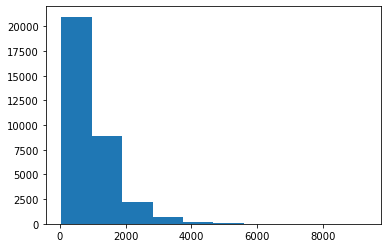

In [24]:
plt.hist(textLengthPerQuestion[5:len(textLengthPerQuestion)])
plt.show()

### Wie oft taucht ein Tag alleine bzw. mit anderen Tags auf?

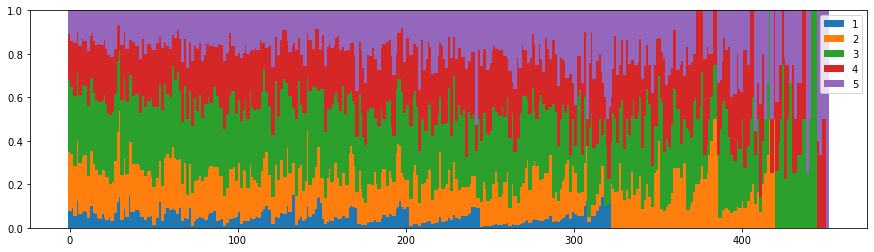

In [25]:
tagAppearances = {}
for question in questions:
    tagArray = question.attrib['Tags']
    for tag in tagArray:
        if tag not in tagAppearances:
            tagAppearances[tag] = [0, 0, 0, 0, 0, 0]
        tagAppearances[tag][0] += 1
        tagAppearances[tag][len(tagArray)] += 1
        
# print(tagAppearances.items())
sortedTagAppearances = dict(sorted(tagAppearances.items(), key = lambda x: (x[1][1], x[1][2], x[1][3], x[1][4], x[1][5]), reverse=True))
        
x = range(0, len(sortedTagAppearances))
y1 = list(map(lambda x: sortedTagAppearances[x][1] / sortedTagAppearances[x][0], sortedTagAppearances.keys()))
y2 = list(map(lambda x: sortedTagAppearances[x][2] / sortedTagAppearances[x][0], sortedTagAppearances.keys()))
y3 = list(map(lambda x: sortedTagAppearances[x][3] / sortedTagAppearances[x][0], sortedTagAppearances.keys()))
y3_bottom = list(map(lambda x: sortedTagAppearances[x][1] / sortedTagAppearances[x][0] + sortedTagAppearances[x][2] / sortedTagAppearances[x][0], sortedTagAppearances.keys()))
y4 = list(map(lambda x: sortedTagAppearances[x][4] / sortedTagAppearances[x][0], sortedTagAppearances.keys()))
y4_bottom = list(map(lambda x: sortedTagAppearances[x][1] / sortedTagAppearances[x][0] + sortedTagAppearances[x][2] / sortedTagAppearances[x][0] + sortedTagAppearances[x][3] / sortedTagAppearances[x][0], sortedTagAppearances.keys()))
y5 = list(map(lambda x: sortedTagAppearances[x][5] / sortedTagAppearances[x][0], sortedTagAppearances.keys()))
y5_bottom = list(map(lambda x: sortedTagAppearances[x][1] / sortedTagAppearances[x][0] + sortedTagAppearances[x][2] / sortedTagAppearances[x][0] + sortedTagAppearances[x][3] / sortedTagAppearances[x][0] + sortedTagAppearances[x][4] / sortedTagAppearances[x][0], sortedTagAppearances.keys()))

barWidth = 2       # the width of the bars: can also be len(x) sequence

plt.figure(figsize=(15,4))
plt.bar(x, y1, width=barWidth, label='1')
plt.bar(x, y2, width=barWidth, bottom=y1, label='2')
plt.bar(x, y3, width=barWidth, bottom=y3_bottom, label='3')
plt.bar(x, y4, width=barWidth, bottom=y4_bottom, label='4')
plt.bar(x, y5, width=barWidth, bottom=y5_bottom, label='5')

plt.legend()
plt.show()

### Wie oft taucht ein Tag mit welchen anderen Tags auf?

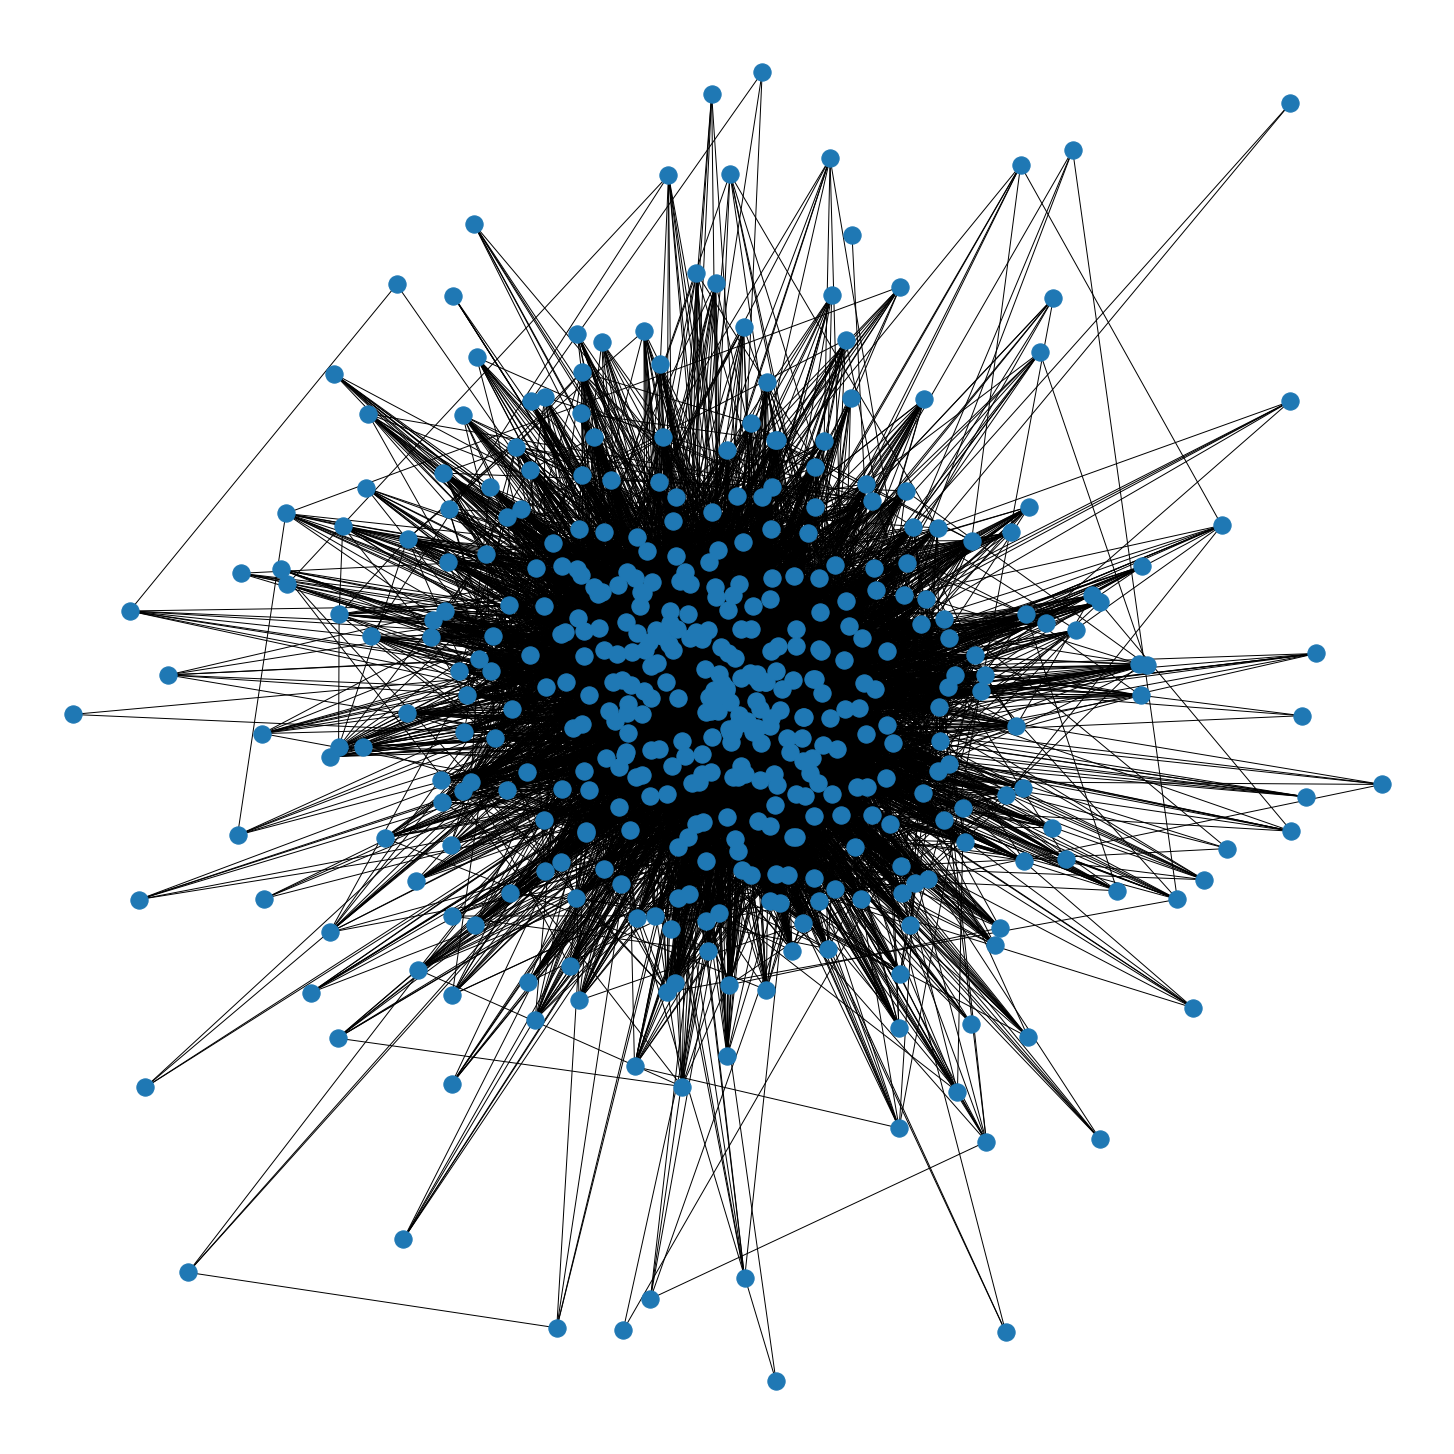

In [26]:
import networkx as nx

G = nx.Graph()

def addTuples(array, start, end):
    for i in range(start+1, end):
        if array[start] in nx.nodes(G) and array[i] in nx.neighbors(G, array[start]):
            G[array[start]][array[i]]['weight'] += 1
        else:
            G.add_edge(array[start], array[i], weight = 1)
    if end - start > 1:
        addTuples(array, start+1, end)
for question in questions:
    tagArray = question.attrib['Tags']
    addTuples(tagArray, 0, len(tagArray))

plt.figure(figsize=(20,20))
pos = nx.spring_layout(G,k=0.21,iterations=10)
nx.draw(G, pos, )
plt.show()

### Zusammenhang zwischen Question und Tag(s):

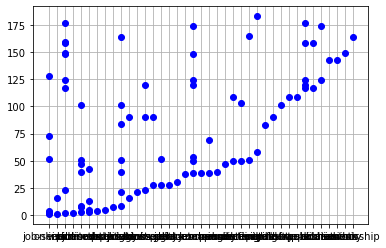

In [27]:
x = []
y = []
for question in questions[0:50]:
    questionId = int(question.attrib['Id'])
    tags = question.attrib['Tags']
    for tag in tags[0:len(tags)-1]:
        x.append(tag)
        y.append(questionId)

plt.plot(x, y, 'bo')
plt.grid(True)
plt.show()

### Tauchen Tags im Titel und/oder Text auf?

In [28]:
text = []
title = []
for question in questions:
    questionTitle = question.attrib['Title']
    questionText = question.attrib['Body']
    questionTags = question.attrib['Tags']
    for tag in questionTags:
        title.append(tag in questionTitle)
        text.append(tag in questionText)

print('{:<20}{:<15}{:<15}'.format('Tags in', 'Ja', 'Nein'))
tagInTitle = len(list(filter(lambda x: x, title))) / len(title)
print('{:<20}{:<15.2f}{:<15.2f}'.format('Title', tagInTitle, 1 - tagInTitle))
tagInText = len(list(filter(lambda x: x, text))) / len(text)
print('{:<20}{:<15.2f}{:<15.2f}'.format('Text', tagInText, 1 - tagInText))
tagInTitleAndText = len([True for i, titleVal in enumerate(title) if titleVal and text[i]]) / len(title)
print('{:<20}{:<15.2f}{:<15.2f}'.format('Title und Text', tagInTitleAndText, 1 - tagInTitleAndText))
tagInTitleOrText = len([True for i, titleVal in enumerate(title) if titleVal or text[i]]) / len(title)
print('{:<20}{:<15.2f}{:<15.2f}'.format('Title oder Text', tagInTitleOrText, 1 - tagInTitleOrText))

Tags in             Ja             Nein           
Title               0.12           0.88           
Text                0.24           0.76           
Title und Text      0.10           0.90           
Title oder Text     0.26           0.74           


## Comments

In [29]:
from academia_tag_recommender.data import comments

print('There are {0} comments'.format(len(comments)))

print('Example comment:')
print(comments[0].attrib)

There are 274442 comments
Example comment:
{'Id': '2', 'PostId': '2', 'Score': '0', 'Text': "Do you mean in private industry or in an instructional capacity?  I suspect that these answers will vary wildly based on geographic region(s) your interested in, so it'd be nice to have that information.", 'CreationDate': '2012-02-14T21:06:14.900', 'UserId': '30', 'ContentLicense': 'CC BY-SA 3.0'}


## Votes

In [30]:
from academia_tag_recommender.data import votes

print('There are {0} votes'.format(len(votes)))

print('Example vote:')
print(votes[0].attrib)

There are 1232032 votes
Example vote:
{'Id': '1', 'PostId': '6', 'VoteTypeId': '2', 'CreationDate': '2012-02-14T00:00:00.000'}
